### Q1. Visualize the distribution of residuals for a multiple linear regression model using the "diamonds" dataset

<Axes: xlabel='price', ylabel='Count'>

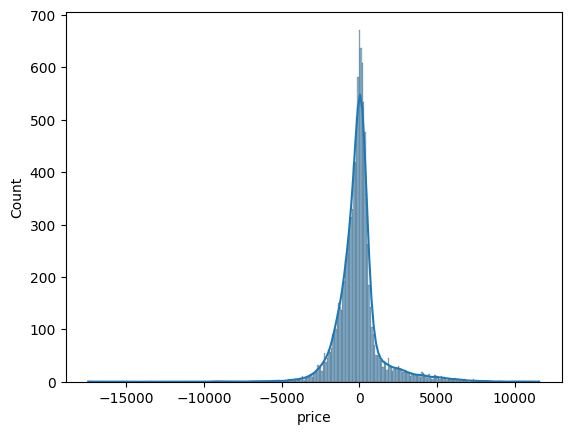

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.dropna()

X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)

### Q2. Calculate and print MSE, MAE, and RMSE for a linear regression model

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2242178.9040856077
Mean Absolute Error: 888.480863390113
Root Mean Squared Error: 1497.3906985438396


### Q3. Check assumptions of linear regression

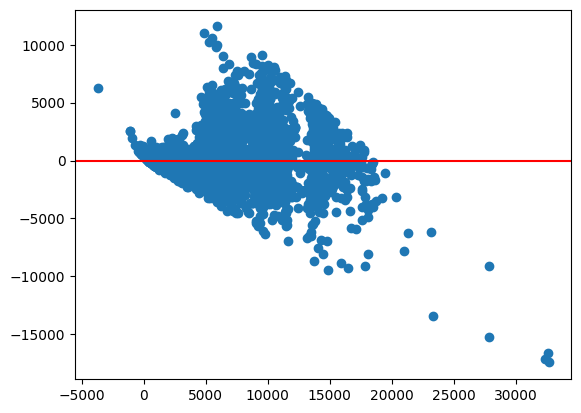

<Axes: >

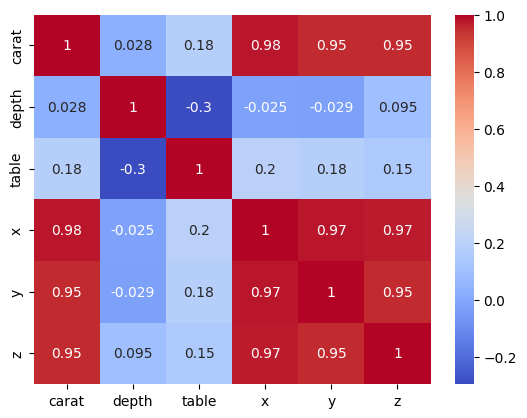

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.show()

sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

### Q4. Create a machine learning pipeline with feature scaling and evaluate regression models

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

y = y.ravel() 

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print("Cross-validated R-squared scores:", scores)
print("Mean R-squared score:", np.mean(scores))

Cross-validated R-squared scores: [0.98602725 0.9960505  0.99401637 0.99487977 0.99141862]
Mean R-squared score: 0.9924785018423453


### Q5. Implement a simple linear regression model and print coefficients, intercept, and R-squared score

In [28]:
from sklearn.metrics import r2_score

simple_X = diamonds[['carat']]
simple_y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(simple_X, simple_y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_pred = simple_model.predict(X_test)

print("Coefficient:", simple_model.coef_)
print("Intercept:", simple_model.intercept_)
print("R-squared score:", r2_score(y_test, y_pred))

Coefficient: [7768.91049036]
Intercept: -2261.9117456493095
R-squared score: 0.8489390686155807


### 6. Analyze relationship between total bill and tip in the "tips" dataset using simple linear regression

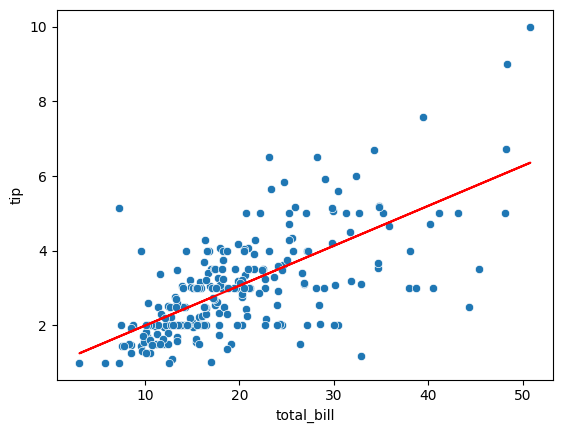

In [7]:
tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sns.scatterplot(x=X['total_bill'], y=y)
plt.plot(X['total_bill'], model.predict(X), color='red')

### Q7. Fit a linear regression model to a synthetic dataset with one feature and plot the regression line

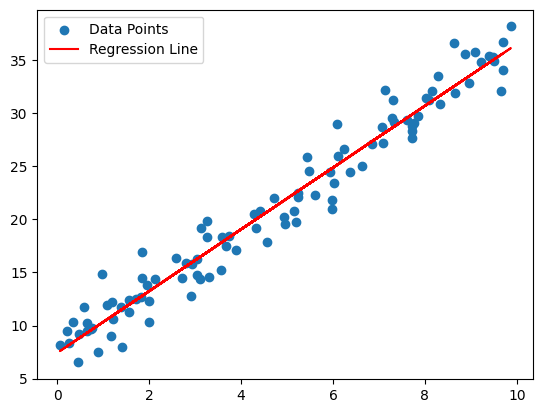

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + 7 + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()

### Q8. Pickle a trained linear regression model and save it to a file

In [9]:
import pickle

with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### Q9. Fit a polynomial regression model (degree 2) to a dataset and plot the regression curve

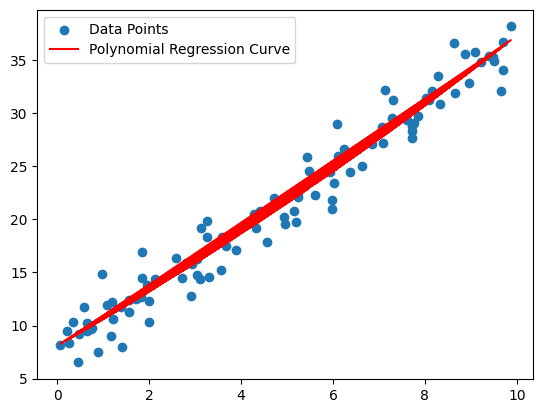

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

plt.scatter(X, y, label='Data Points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial Regression Curve')
plt.legend()
plt.show()

### Q10. Generate synthetic data for simple linear regression and print model details

In [11]:
X = np.random.rand(100, 1) * 5
y = 4 * X - 3 + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [[4.05566471]]
Intercept: [-3.13498949]


### Q11. Fit polynomial regression models of different degrees and compare performance

In [12]:
from sklearn.metrics import r2_score

degrees = [1, 2, 3, 4]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_poly_pred = poly_model.predict(X_poly)
    
    r2 = r2_score(y, y_poly_pred)
    print(f"Degree {degree}: R-squared = {r2}")

Degree 1: R-squared = 0.9769549922441102
Degree 2: R-squared = 0.976955519305065
Degree 3: R-squared = 0.9776175987634644
Degree 4: R-squared = 0.9777549612391835


### Q12. Fit a simple linear regression model with two features and print model details

In [13]:
X = np.random.rand(100, 2) * 10
y = 5 * X[:, 0] + 3 * X[:, 1] + 2 + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared Score:", model.score(X, y))

Coefficients: [5.00370179 2.99827982]
Intercept: 1.8543703048914395
R-squared Score: 0.9976352585099146


### Q13. Generate synthetic data, fit a linear regression model, and visualize the results

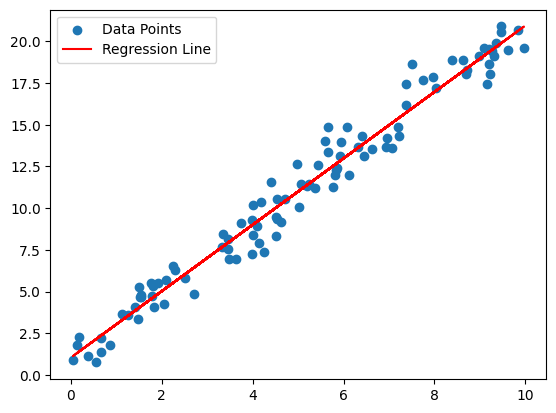

In [14]:
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()

### Q14. Check for multicollinearity using the Variance Inflation Factor (VIF)

In [15]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 6)])

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Feature       VIF
0  Feature_1  1.019320
1  Feature_2  1.012651
2  Feature_3  1.059337
3  Feature_4  1.046592
4  Feature_5  1.020596


### Q15. Generate synthetic data for a polynomial relationship (degree 4) and plot the regression curve

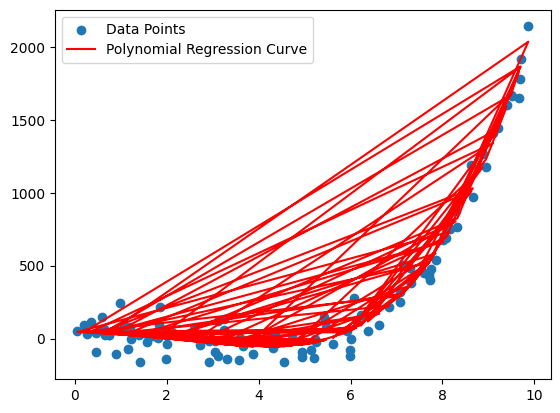

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 0.5 * X**4 - 3 * X**3 + 2 * X**2 + X + np.random.randn(100, 1) * 100

poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve')
plt.legend()
plt.show()

### Q16. Create a machine learning pipeline with standardization and linear regression

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X, y)
print("R-squared Score:", pipeline.score(X, y))

R-squared Score: 0.9999640680199118


### Q17. Perform polynomial regression (degree 3) on a synthetic dataset and plot the curve

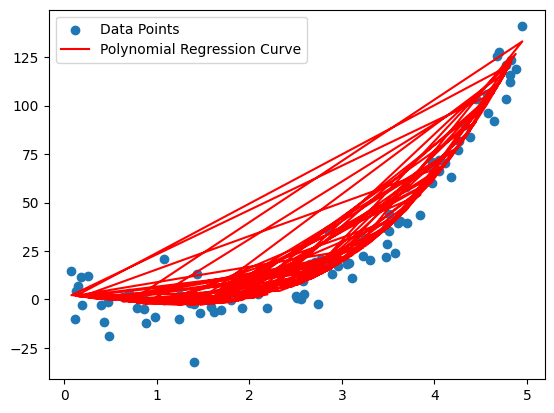

In [18]:
X = np.random.rand(100, 1) * 5
y = 2 * X**3 - 5 * X**2 + 3 * X + np.random.randn(100, 1) * 10

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve')
plt.legend()
plt.show()

### Q18. Perform multiple linear regression on a synthetic dataset with 5 features

In [19]:
X, y = make_regression(n_samples=100, n_features=5, noise=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)

print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared Score: 0.9999982254619881
Coefficients: [60.60253283 98.65713366 64.52610038 57.03609639 35.60928035]
Intercept: -0.0017050586754230324


### Q19. Generate synthetic data for linear regression and visualize the regression line

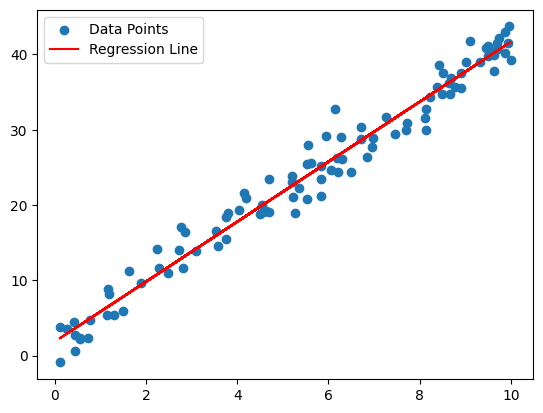

In [20]:
X = np.random.rand(100, 1) * 10
y = 4 * X + 2 + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()

### Q20. Create a synthetic dataset with 3 features and perform multiple linear regression

In [21]:
X, y = make_regression(n_samples=100, n_features=3, noise=0.3, random_state=42)

model = LinearRegression()
model.fit(X, y)

print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared Score: 0.9999870706089867
Coefficients: [28.20687017 75.02937671 17.77558537]
Intercept: 0.03747754727733632


### Q21. Serialize and deserialize machine learning models using joblib

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import joblib

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
model = LinearRegression()
model.fit(X, y)

joblib.dump(model, 'linear_model.joblib')

loaded_model = joblib.load('linear_model.joblib')
print("R-squared Score (Loaded Model):", loaded_model.score(X, y))

R-squared Score (Loaded Model): 0.9999989877187189


### Q22. Perform linear regression with categorical features using one-hot encoding

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tips = sns.load_dataset('tips')

X = pd.get_dummies(tips[['total_bill', 'sex', 'smoker', 'day', 'time']], drop_first=True)
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("R-squared Score:", model.score(X_test, y_test))

R-squared Score: 0.47735804203610943


### Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset

In [24]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

linear_model.fit(X, y)
ridge_model.fit(X, y)

print("Linear Regression - R-squared:", linear_model.score(X, y))
print("Ridge Regression - R-squared:", ridge_model.score(X, y))
print("Linear Regression Coefficients:", linear_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)

Linear Regression - R-squared: 0.9999995564125111
Ridge Regression - R-squared: 0.9998666852290666
Linear Regression Coefficients: [60.59000738 98.65432927 64.55891226 57.05696343 35.60947647]
Ridge Regression Coefficients: [60.00694188 97.51793602 63.45136759 56.40717681 35.40203643]


### Q24. Use cross-validation to evaluate a Linear Regression model

In [25]:
from sklearn.model_selection import cross_val_score

X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared Scores:", scores)
print("Mean R-squared Score:", scores.mean())

Cross-validated R-squared Scores: [0.99999232 0.99999394 0.99999572 0.99999343 0.99999149]
Mean R-squared Score: 0.9999933821726653


### Q25. Compare polynomial regression models of different degrees

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = np.random.rand(100, 1) * 5
y = 3 * X**3 - 2 * X**2 + 4 * X + np.random.randn(100, 1) * 5

degrees = [1, 2, 3, 4]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    print(f"Degree {degree}: R-squared = {r2_score(y, y_pred)}")

Degree 1: R-squared = 0.8601631412544033
Degree 2: R-squared = 0.9933623800037426
Degree 3: R-squared = 0.9967783265464626
Degree 4: R-squared = 0.9967817140901626
